In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/690F

/content/drive/.shortcut-targets-by-id/1KB14OgLyofEEgio9tyX1hgpiVoYTq_ID/690F


In [3]:
import string
print(type(string.punctuation))
punct=string.punctuation
print(punct)

<class 'str'>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_df = pd.read_csv("train.csv")
# test_data = pd.read_csv("test_public_expanded.csv")
# test_len = len(test_data.index)

In [6]:
train_df.shape

(1804874, 45)

In [7]:
identities = ['male','female','transgender','other_gender','heterosexual','homosexual_gay_or_lesbian',
              'bisexual','other_sexual_orientation','christian','jewish','muslim','hindu','buddhist',
              'atheist','other_religion','black','white','asian','latino','other_race_or_ethnicity',
              'physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness',
              'other_disability']

In [8]:
train_labeled_df = train_df.loc[:, ['target'] + identities].dropna()
toxic_df = train_labeled_df[train_labeled_df['target'] >= .5][identities]
non_toxic_df = train_labeled_df[train_labeled_df['target'] < .5][identities]

In [9]:
toxic_count = toxic_df.where(train_labeled_df == 0, other = 1).sum()
non_toxic_count = non_toxic_df.where(train_labeled_df == 0, other = 1).sum()

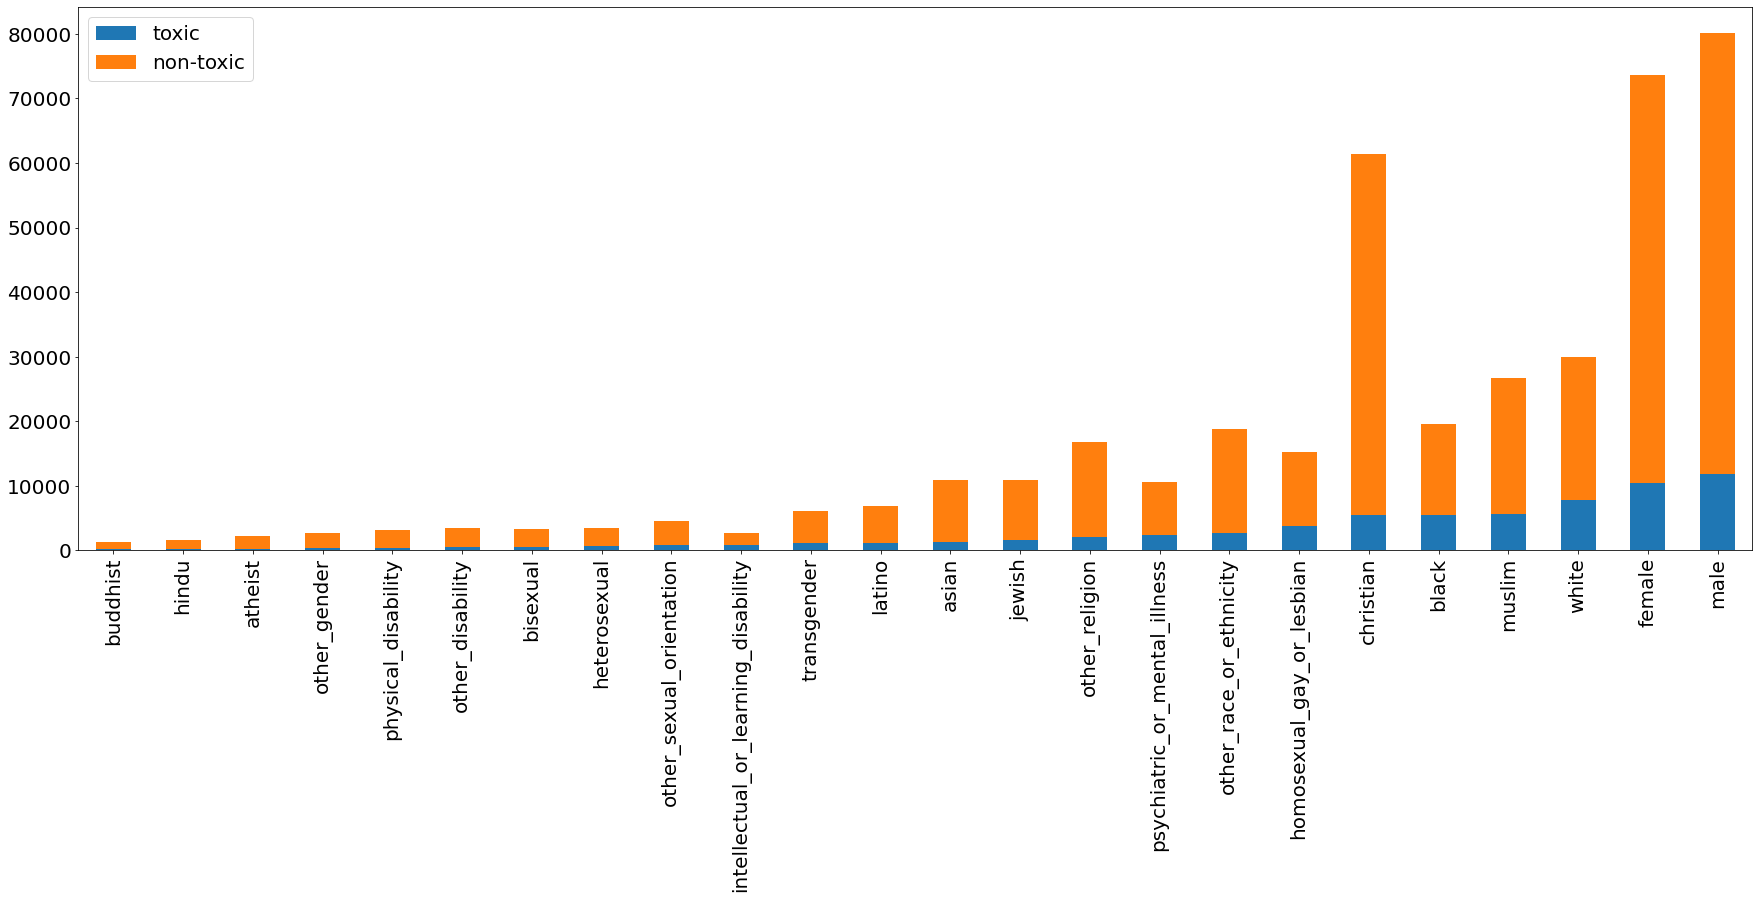

In [10]:
# now we can concat the two series together to get a toxic count vs non toxic count for each identity
toxic_vs_non_toxic = pd.concat([toxic_count, non_toxic_count], axis=1)
toxic_vs_non_toxic = toxic_vs_non_toxic.rename(index=str, columns={1: "non-toxic", 0: "toxic"})
# here we plot the stacked graph but we sort it by toxic comments to (perhaps) see something interesting
toxic_vs_non_toxic.sort_values(by='toxic').plot(kind='bar', stacked=True, figsize=(30,10), fontsize=20).legend(prop={'size': 20})

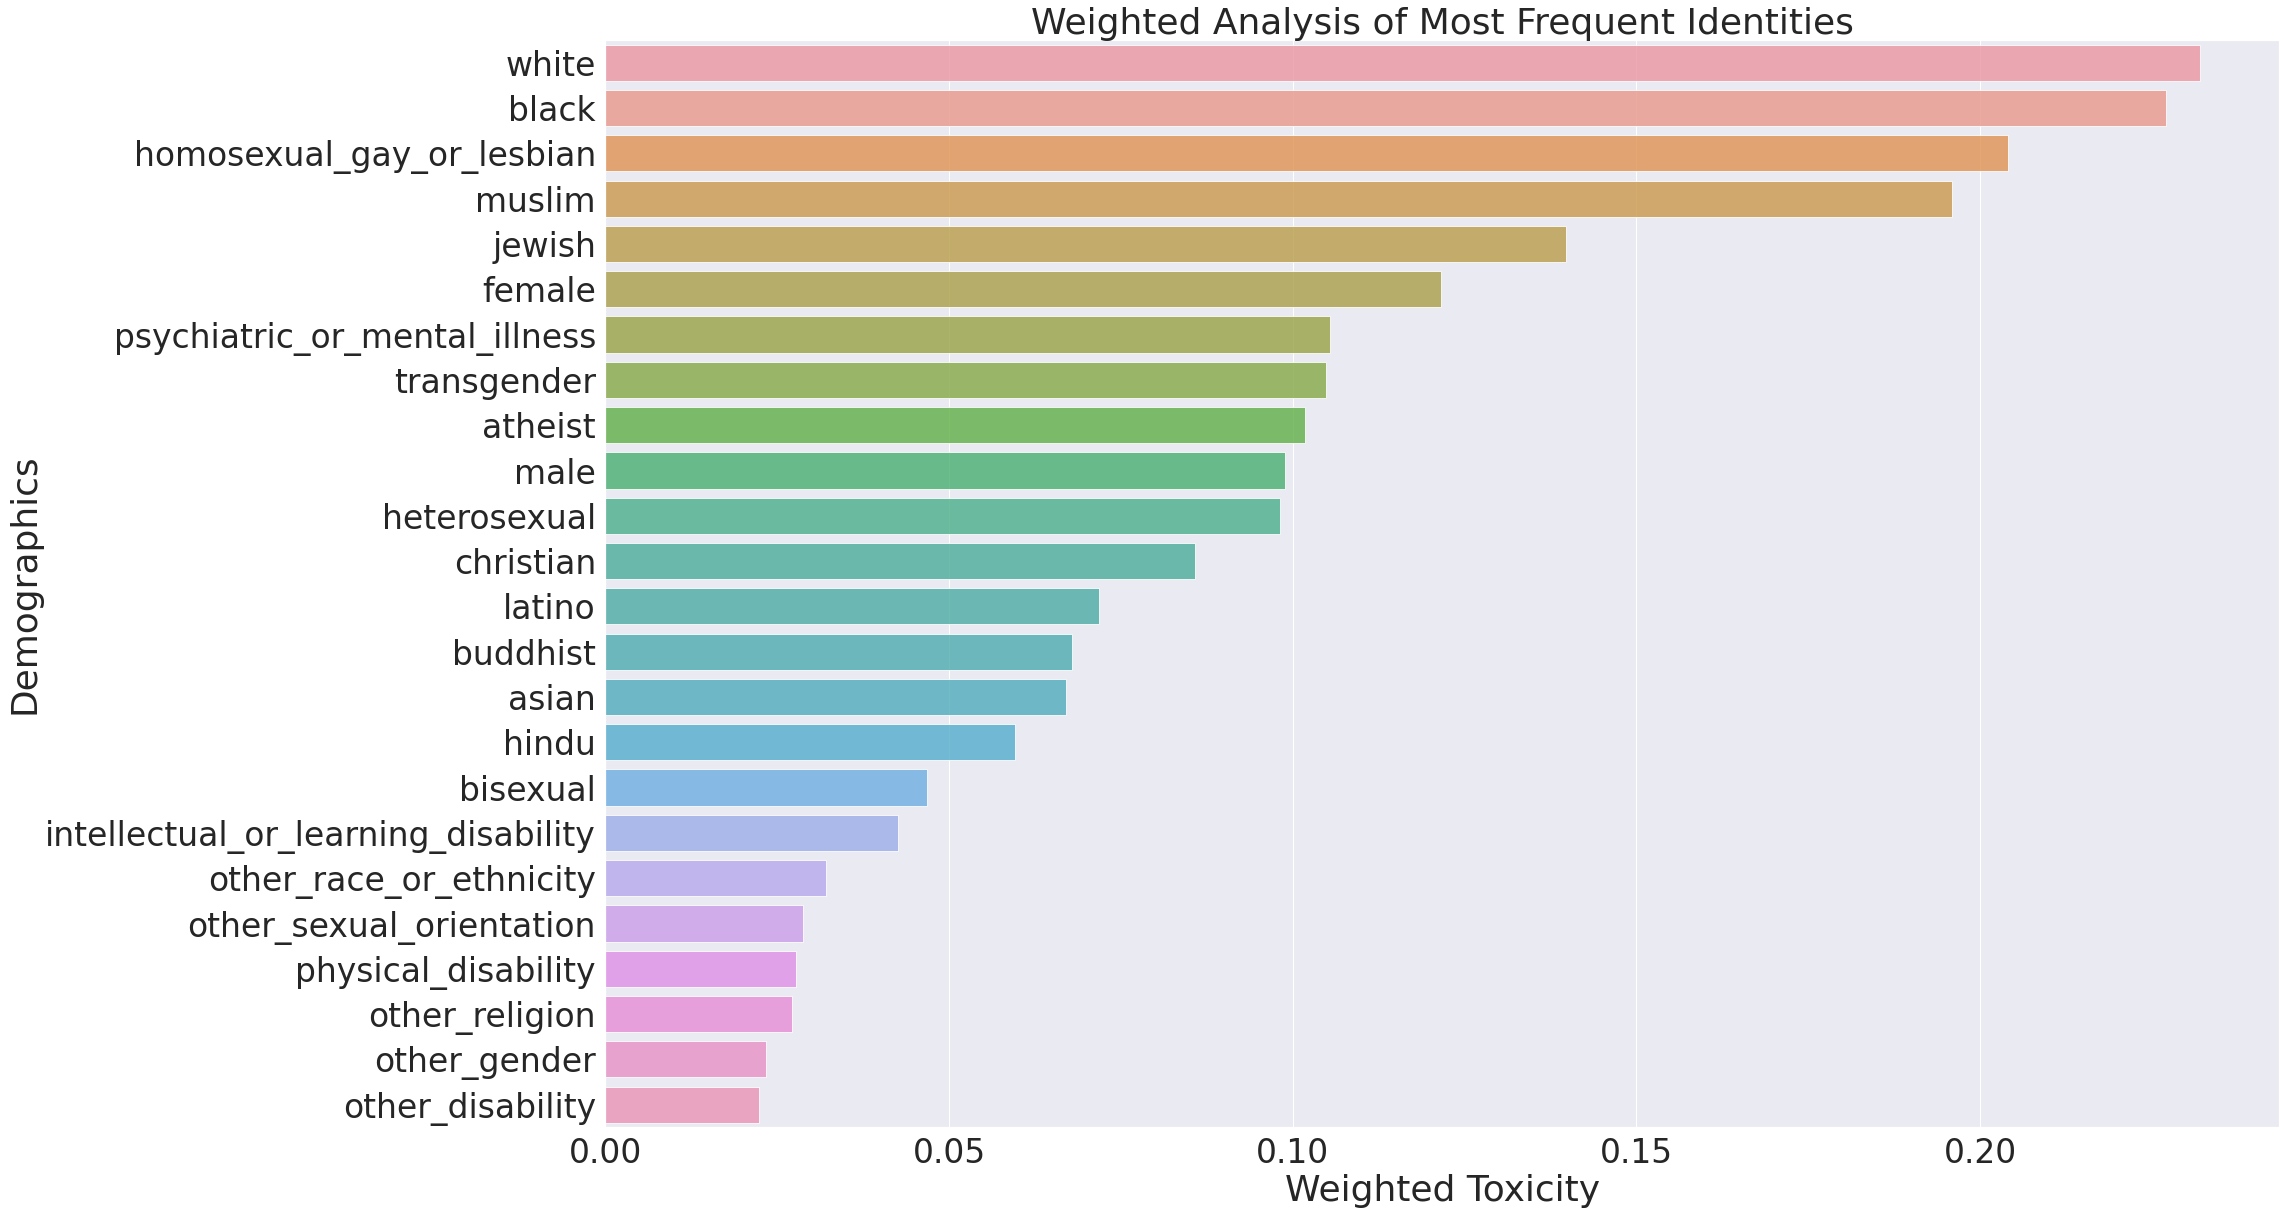

In [11]:
# First we multiply each identity with the target
weighted_toxic = train_labeled_df.iloc[:, 1:].multiply(train_labeled_df.iloc[:, 0], axis="index").sum() 
# changing the value of identity to 1 or 0 only and get comment count per identity group
identity_label_count = train_labeled_df[identities].where(train_labeled_df == 0, other = 1).sum()
# then we divide the target weighted value by the number of time each identity appears
weighted_toxic = weighted_toxic / identity_label_count
weighted_toxic = weighted_toxic.sort_values(ascending=False)
# plot the data using seaborn like before
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values , y = weighted_toxic.index, alpha=0.8)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxicity')
plt.title('Weighted Analysis of Most Frequent Identities')
plt.show()

In [12]:
# test_data = test_data[test_data['comment_text'].apply(lambda x: len(str(x)) >= 3)]
train_df = train_df[train_df['comment_text'].apply(lambda x: len(str(x)) >= 3)]

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "can not", "'cause": "because",
                       "could've": "could have", "couldn't": "could not", "didn't": "did not", 
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would",
                       "he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
                       "I'll've": "I will have","I'm": "I am", "I've": "I have",
                       "i'd": "i would", "i'd've": "i would have", "i'll": "i will",
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not",
                       "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                       "it'll've": "it will have","it's": "it is", "let's": "let us",
                       "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                       "mightn't": "might not","mightn't've": "might not have", 
                       "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                       "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", 
                       "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                       "she'd've": "she would have", "she'll": "she will",
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", 
                       "so've": "so have","so's": "so as", "this's": "this is",
                       "that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", 
                       "there's": "there is", "here's": "here is","they'd": "they would", 
                       "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", 
                       "they've": "they have", "to've": "to have", "wasn't": "was not",
                       "we'd": "we would", "we'd've": "we would have", "we'll": 
                       "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
                       "what're": "what are",  "what's": "what is", "what've": "what have", 
                       "when's": "when is", "when've": "when have", "where'd": "where did", 
                       "where's": "where is", "where've": "where have", "who'll": "who will", 
                       "who'll've": "who will have", "who's": "who is", "who've": "who have", 
                       "why's": "why is", "why've": "why have", "will've": "will have",
                       "won't": "will not", "won't've": "will not have", "would've": "would have",
                       "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", 
                       "y'all'd": "you all would","y'all'd've": "you all would have",
                       "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
                       "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" }

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

train_df['comment_text'] = train_df['comment_text'].apply(lambda x: clean_contractions(x, contraction_mapping))
# test_data['comment_text'] = test_data['comment_text'].apply(lambda x: clean_contractions(x, contraction_mapping))

In [13]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in punct]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
train_df['comment_text']=train_df['comment_text'].apply(lambda x: remove_punctuation(x))
# test_data['comment_text']=test_data['comment_text'].apply(lambda x: remove_punctuation(x))

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def stemi(docu):
    texts =  [t for t in docu.split() if t not in stopwords]
    doc= ' '.join(texts)
    return doc
    
stopwords = set(stopwords.words('english'))
# SnowballStemmer = SnowballStemmer("english")
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: stemi(x))
# test_data['comment_text'] = test_data['comment_text'].apply(lambda x: stemi(x))
# test_data.dropna(inplace= True)
# x = X.apply(lambda docu : stemi(docu))

# # test_data['comment_text_no_punct_split']=test_data['comment_text_no_punct'].apply(lambda x: tokenize(x.lower()))
# test_data.head()

In [16]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: remove_stopwords(x))
# test_data['comment_text'] = test_data['comment_text'].apply(lambda x: remove_stopwords(x))

def preprocess(data):
    def clean_special_chars(text):
        punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&…'
        for p in punct:
            text = text.replace(p, ' ')
        for p in '0123456789':
            text = text.replace(p, ' ')
        #for p in "?!.,":
        #    text = text.replace(p, ' ' + p)
        return text

    data = data.astype(str).apply(lambda x: clean_special_chars(x))
    return data

train_df['comment_text'] = preprocess(train_df['comment_text'])
# test_data['comment_text'] = preprocess(test_data['comment_text'])

table = str.maketrans('ᴀʙᴄᴅᴇғɢʜɪᴊᴋʟᴍɴᴏᴘʀᴛᴜᴠᴡʏᴢ', 'abcdefghijklmnoprtuvwyx')
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.translate(table))
# test_data['comment_text'] = test_data['comment_text'].apply(lambda x: x.translate(table))

import re
def tokenize(text):
    split=re.split("\W+",text) 
    return split
train_df['comment_text_tokenized'] = train_df['comment_text'].apply(lambda x: tokenize(x.lower()))
# test_data['comment_text_tokenized'] = test_data['comment_text'].apply(lambda x: tokenize(x.lower()))

# vectorizer = CountVectorizer()
# vectorizer.fit(train_df["comment_text"])

In [17]:
train_df.head().loc[:, ["comment_text", "comment_text_tokenized"]]

,comment_text,comment_text_tokenized
0,This cool Its like want mother read Really gre...,"[this, cool, its, like, want, mother, read, re..."
1,Thank This life lot anxietyinducing Keep let way,"[thank, this, life, lot, anxietyinducing, keep..."
2,This urgent design problem kudos taking Very i...,"[this, urgent, design, problem, kudos, taking,..."
3,Is I able install site When releasing,"[is, i, able, install, site, when, releasing]"
4,haha guys bunch losers,"[haha, guys, bunch, losers]"


In [18]:
# import wordcloud
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [24]:
from collections import Counter
def class_wordcloud(dataframe, label, max_words):
    # data preprocessing: concatenate all reviews per class
    all_words = []
    text = " ".join(x for x in dataframe[dataframe[label]==1].comment_text)
    wordcloud = WordCloud(max_words=max_words, collocations=False).generate(text)
    text_dictionary = wordcloud.process_text(text)
    # sort the dictionary
    word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
    all_words.append(list(word_freq.keys())[:5])
    all_words.append(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most popular {max_words} words in class {label}")
    plt.show()
    return all_words

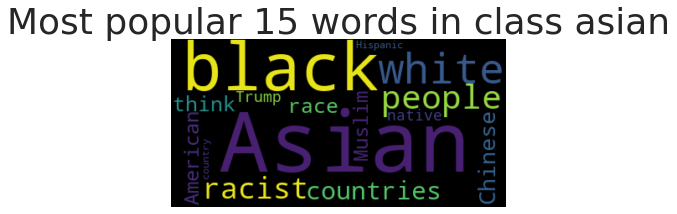

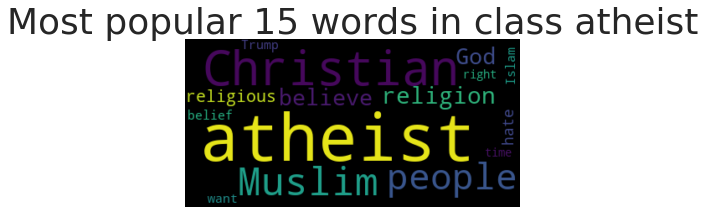

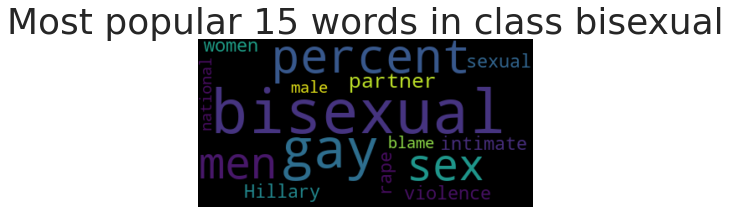

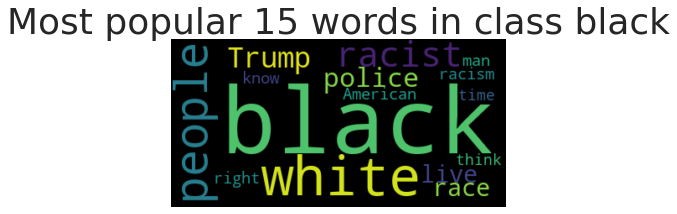

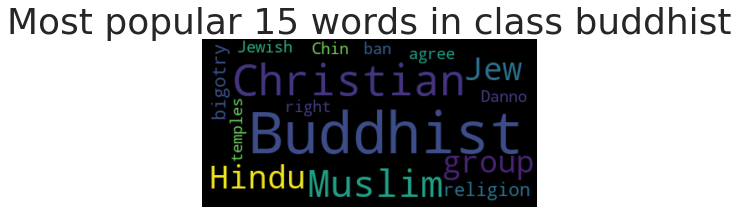

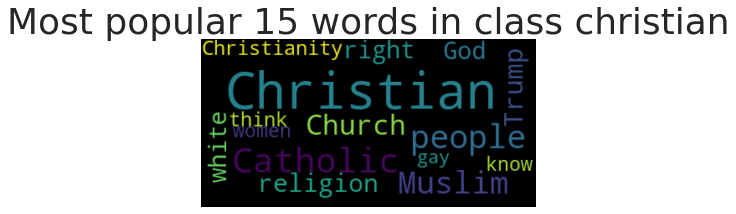

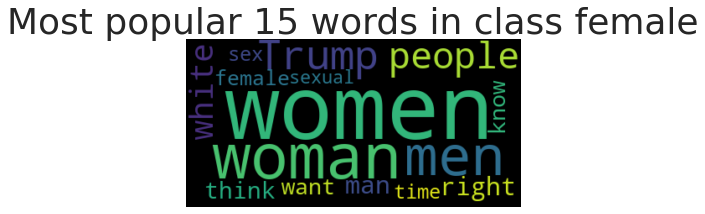

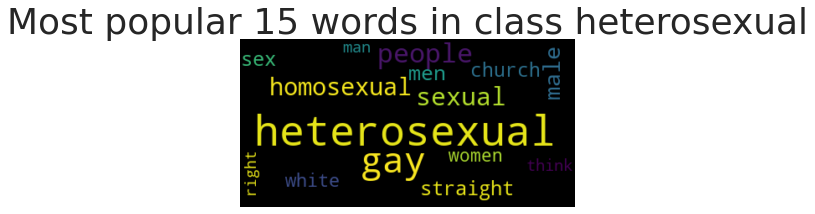

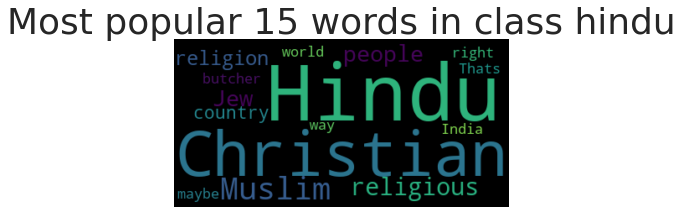

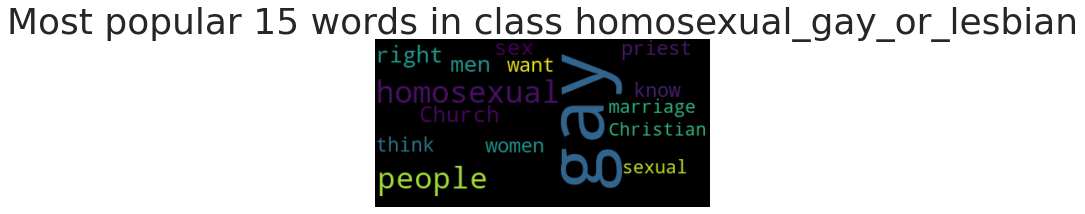

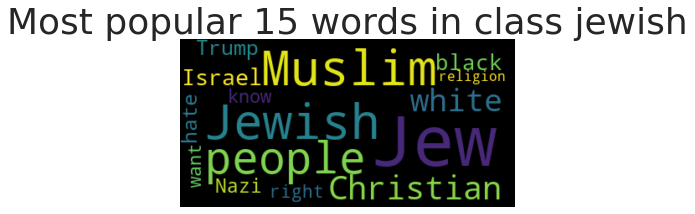

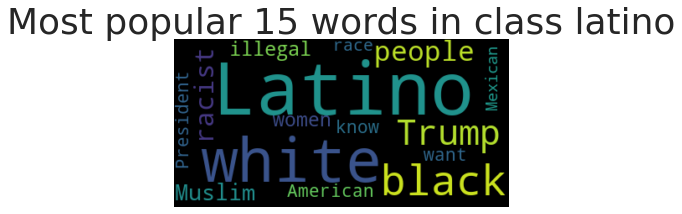

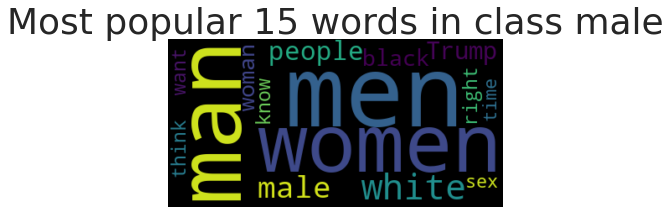

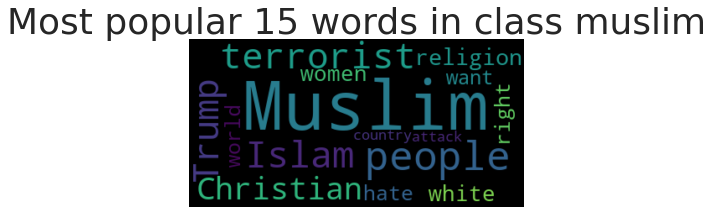

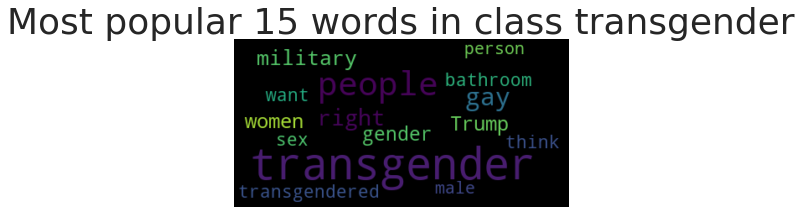

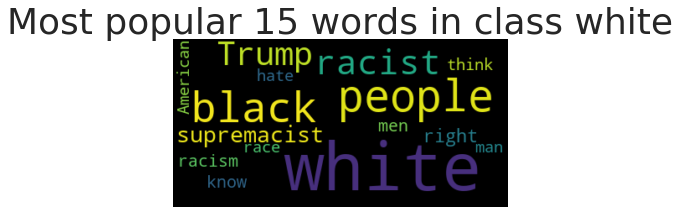

In [25]:
# train_labeled_df = train_df.loc[:, ['target'] + ['comment_text'] + identities].dropna()
toxic_df = train_df[train_df['target'] >= .5]
non_toxic_df = train_df[train_df['target'] < .5]
# labels = ['asian','black', 'christian', 'hindu',
#        'homosexual_gay_or_lesbian',
#        'jewish', 'latino', 'muslim',
#        'transgender']
labels = ['asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian',
       'jewish', 'latino', 'male', 'muslim',
       'transgender', 'white']
for label in labels:
    class_wordcloud(toxic_df, label, 15)

In [27]:
static_all_id_words = ['black','blacks','catholic','catholics','christian','christianity','christians','church','gay', 'germany','hitler','islamic','jesus','jew','jewish','jews','men','mental',
'muslim','muslims','nazi','nazis','she','white','women','believe','bishops','black','blacks','church', 'disorder', 'faith', 'islam', 'asian', 'trump', 'latino',
'female','gay','gays','guy','her','homosexual','homosexuals','illness','issues','jews','male','males','man','marriage','men','mental','mentally','muslim','muslims',
'priests','race','racial','racism','rights','schools','sexual','supremacist','supremacists','terrorist','wedding','white','whites','woman','women', 'military','transgender']

In [36]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
X_train = train_df.drop(['id','target'], axis=1)
Y_train = (train_df['target'] >= 0.5).astype(int)

TOXICITY_COLUMN = 'target'
TEXT_COLUMN = 'comment_text'
MAX_NUM_WORDS = 300000
TOKENIZER_FILTER = '\r\t\n'

# Create a text tokenizer.
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters=TOKENIZER_FILTER)
tokenizer.fit_on_texts(list(X_train[TEXT_COLUMN]))

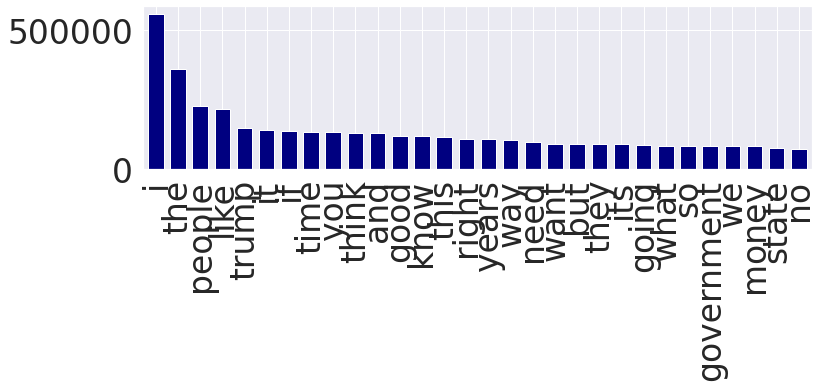

In [37]:
counter = sorted(dict(tokenizer.word_docs).items(), key=lambda x:x[1], reverse=True)
wordcount = pd.Series([x[1] for x in counter], [x[0] for x in counter])
del counter

wordcount[:30].plot.bar(color='navy', width=0.7, figsize=(12,3))

In [38]:
tokenizer_tx = Tokenizer(num_words=MAX_NUM_WORDS, filters=TOKENIZER_FILTER)
tokenizer_tx.fit_on_texts(list(X_train.loc[Y_train == 1, TEXT_COLUMN]))

counter = sorted(dict(tokenizer_tx.word_docs).items(), key=lambda x:x[1], reverse=True)
wordcount_tx = pd.Series([x[1] for x in counter], [x[0] for x in counter])

wordcount_stats = pd.concat([wordcount, wordcount_tx], axis=1, keys=[0, 'toxic'], sort=False)
wordcount_only_tx = wordcount_stats[wordcount_stats[0] * 0.5 <= wordcount_stats['toxic']].copy()
wordcount_only_tx.drop('toxic', axis=1, inplace=True)
wordcount_only_tx = wordcount_only_tx[wordcount_only_tx[0] > 1]

print(len(wordcount_only_tx))
wordcount_only_tx[:15]

10467


,0
stupid,16001
ignorant,8457
idiot,5440
pathetic,5439
dumb,5119
liar,4929
fool,4700
crap,4664
idiots,3887
damn,3728


In [ ]:
train_df['muslim'].mean()

0.04946616481030493

In [33]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
X_train = toxic_df.drop(['id','muslim'], axis=1)
Y_train = (toxic_df['muslim'] >= 0.5).astype(int)

TOXICITY_COLUMN = 'muslim'
TEXT_COLUMN = 'comment_text'
MAX_NUM_WORDS = 300000
TOKENIZER_FILTER = '\r\t\n'

# Create a text tokenizer.
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters=TOKENIZER_FILTER)
tokenizer.fit_on_texts(list(X_train[TEXT_COLUMN]))

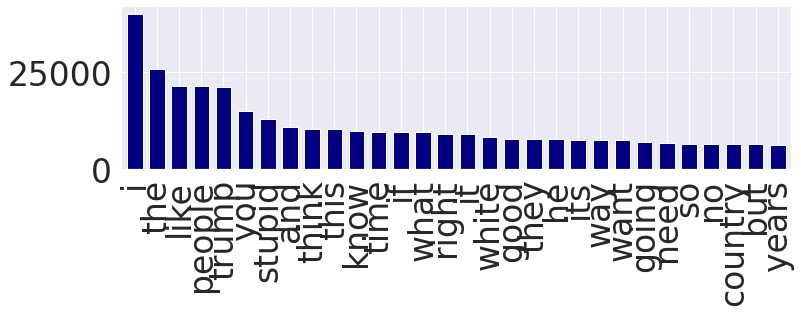

In [34]:
counter = sorted(dict(tokenizer.word_docs).items(), key=lambda x:x[1], reverse=True)
wordcount = pd.Series([x[1] for x in counter], [x[0] for x in counter])
del counter

wordcount[:30].plot.bar(color='navy', width=0.7, figsize=(12,3))

In [ ]:
tokenizer_tx = Tokenizer(num_words=MAX_NUM_WORDS, filters=TOKENIZER_FILTER)
tokenizer_tx.fit_on_texts(list(X_train.loc[Y_train == 1, TEXT_COLUMN]))

counter = sorted(dict(tokenizer_tx.word_docs).items(), key=lambda x:x[1], reverse=True)
print(counter)
wordcount_tx = pd.Series([x[1] for x in counter], [x[0] for x in counter])

wordcount_stats = pd.concat([wordcount, wordcount_tx], axis=1, keys=[0, 'toxic'], sort=False)
wordcount_only_tx = wordcount_stats[wordcount_stats[0] * 0.5 <= wordcount_stats['toxic']].copy()
wordcount_only_tx.drop('toxic', axis=1, inplace=True)
wordcount_only_tx = wordcount_only_tx[wordcount_only_tx[0] > 1]
wordcount_only_tx[:50]

[('muslims', 2203), ('muslim', 2076), ('i', 1433), ('the', 1175), ('people', 1001), ('islam', 875), ('like', 764), ('trump', 652), ('islamic', 556), ('world', 482), ('religion', 479), ('it', 464), ('you', 463), ('white', 462), ('and', 443), ('country', 435), ('if', 427), ('terrorists', 425), ('women', 412), ('hate', 385), ('know', 382), ('terrorist', 382), ('want', 382), ('right', 377), ('they', 375), ('christians', 368), ('canada', 353), ('think', 346), ('this', 343), ('time', 333), ('countries', 325), ('what', 317), ('so', 316), ('way', 301), ('kill', 301), ('good', 300), ('its', 296), ('but', 295), ('us', 291), ('we', 284), ('christian', 276), ('need', 275), ('jews', 274), ('years', 257), ('racist', 256), ('killed', 250), ('no', 248), ('america', 247), ('going', 246), ('terrorism', 245), ('ban', 244), ('he', 241), ('believe', 240), ('law', 239), ('not', 235), ('why', 235), ('said', 232), ('radical', 230), ('killing', 228), ('american', 222), ('in', 221), ('obama', 221), ('problem', 

,0
muslims,2209
muslim,2087
islam,1054
islamic,789
sharia,244
islamophobia,198
islamist,169
allah,163
infidels,161
mosque,142
